In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# 실습데이터 형성
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

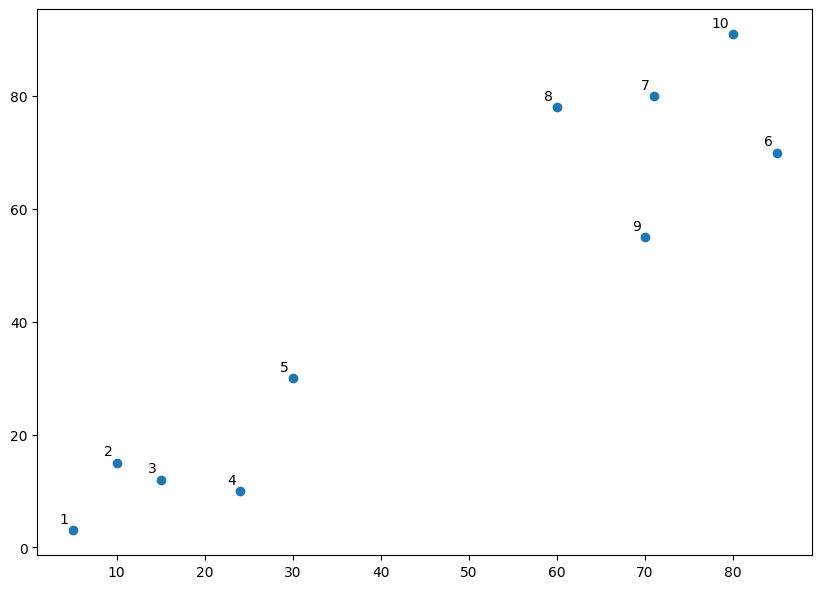

In [5]:
labels = range(1,11)

plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:, 0], X[:,1] , label='True Position')

for label , x , y in zip(labels, X[:, 0], X[:,1] ):
    plt.annotate(
        label, 
        xy=(x , y),
        xytext=(-3,3),
        textcoords="offset points",
        ha='right',
        va='bottom'
                )
plt.show()

In [6]:
from scipy.cluster.hierarchy import dendrogram , linkage

linked = linkage(X , 'single')

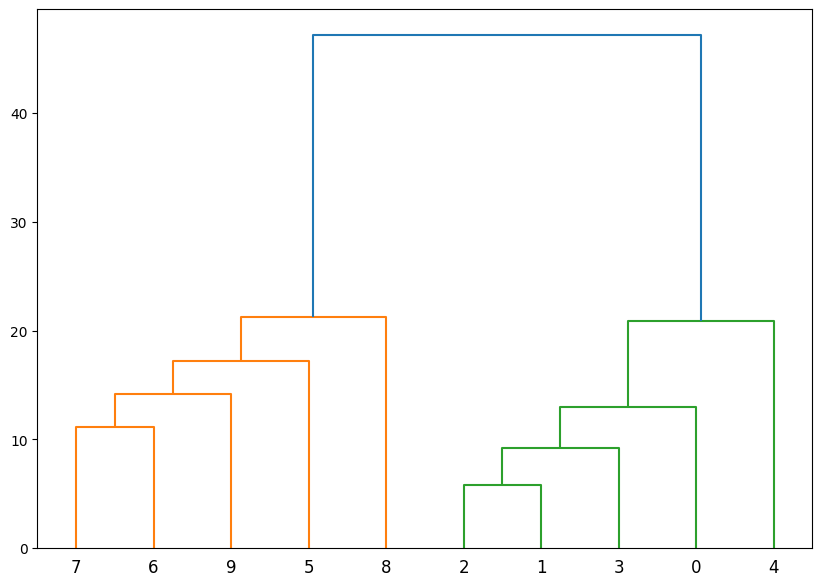

In [8]:
labelList = range(1,11)
plt.figure(figsize=(10, 7))

dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True
)

plt.show()

### 쇼핑 데이터 군집 분석

In [9]:
df = pd.read_csv('./datasets/shopping-data.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


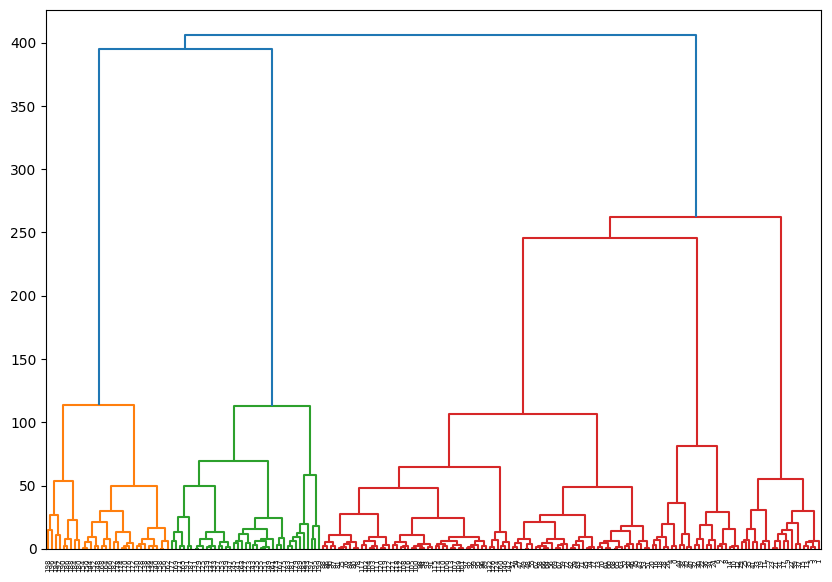

In [13]:
from scipy.cluster.hierarchy import dendrogram , linkage
data = df.iloc[: , 3:5]

linked = linkage(data , 'ward')
plt.figure(figsize=(10, 7))

dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True
)

plt.show()

### 

In [24]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5)
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

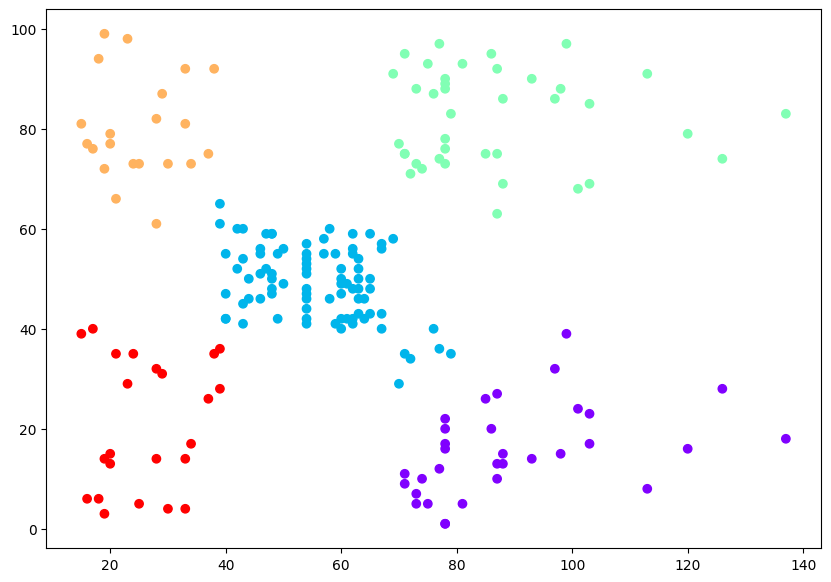

In [25]:

plt.figure(figsize=(10, 7))
plt.scatter(data.iloc[:,0],data.iloc[:,1] , c=cluster.labels_, cmap='rainbow')

In [26]:
data.iloc[:,0]

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64